### Background of Problem Statement :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

### Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

### Analysis Tasks to be performed:

(Perform a service request data analysis of New York City 311 calls) 

* Import a 311 NYC service request.
* Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
* Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
* Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
* Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

>> 1. Whether the average response time across complaint types is similar or not (overall)
2. Are the type of complaint or service requested and location related?

# Struture of Conducting the Research 
* Importing the libraries and  the data 
* Exploring and analysis the data based on Intial Metrics
* Data Wrangling
  * Handling Mislabeled feature columns, Errors & Irrelevant Observations
    * Exploring Univariant DataSet - Categorical feature
    * Exploring Univariant DataSet-Continous Variable 
  * Missing Value Treatment
* Analysis Task 


### Importing the libraries  and the Data 

In [1]:
# import libaries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import scipy.stats as stats

In [2]:
# importing the dataset from the Google Drive 
URL = "/content/drive/MyDrive/Colab Notebooks/SimipliLearn Projects/Project_01/311_Service_Requests_from_2010_to_Present.csv"
df = pd.read_csv(URL)
df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


### Exploring and analyzing the basis metrics

In [3]:
# Exploring the the Basic information about the Dataset and dataType 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [4]:
# Exploring the Initial Stats of the Dataset
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unique Key,300698.0,NaN,NaN,NaN,31300535.56023,573854.692971,30279480.0,30801181.25,31304364.5,31784464.75,32310649.0
Created Date,300698,259493,07-11-15 23:04,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Closed Date,298534,237165,11-08-15 7:34,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agency,300698,1,NYPD,300698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agency Name,300698,3,New York City Police Department,300690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Complaint Type,300698,24,Blocked Driveway,77044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Descriptor,294784,45,Loud Music/Party,61430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location Type,300567,18,Street/Sidewalk,249299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incident Zip,298083.0,NaN,NaN,NaN,10848.888645,583.182081,83.0,10310.0,11208.0,11238.0,11697.0
Incident Address,256288,107652,1207 BEACH AVENUE,904,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Initial Observations 
From the Initial exploration of Data,the following observation are as follows:
* There is huge range of Missing Values in  multiple feature variables, which need to be invistegated futher and handle meaningfully 
* Certain duplications of feature variable were also obsereved . For example the Location column is the combination of Longititude and Latittude .
* From Unique value and frequency column in initial stats table clearly indicates that there are feature variables which is completely valued as "Unspecified".

Therefore it can be concluded that in the data cleaning process, three key  steps are most important 
* Handling Missing value
* Handle Duplication of feature varibles
* Handling Error | Irrelevant obseravtions 

### Data Wrangling 
####  1. Handling Mislabeled feature columns, Errors & Irrelevant Observations

In [5]:
# Standardizing the name of the Feature labels by removing blank spaces and special characters 

## function to fix the mislabled columns
def fix_labels(array):
  new_label_array =[]
  for label in array:
    label_without_special_character=label.replace('(', '').replace(")",'')
    label_without_spaces = label_without_special_character.strip()
    label_without_underscore = label_without_spaces.replace(" ","_")
    new_label_array.append(label_without_underscore)
  return new_label_array
 
df.columns=fix_labels(df.columns)
df.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Description', 'Resolution_Action_Updated_Date',
       'Community_Board', 'Borough', 'X_Coordinate_State_Plane',
       'Y_Coordinate_State_Plane', 'Park_Facility_Name', 'Park_Borough',
       'School_Name', 'School_Number', 'School_Region', 'School_Code',
       'School_Phone_Number', 'School_Address', 'School_City', 'School_State',
       'School_Zip', 'School_Not_Found', 'School_or_Citywide_Complaint',
       'Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location',
       'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp',
       'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_Dire

In [6]:
# Changing data_type of Create_Order and Closed_Date
df["Created_Date"] = pd.to_datetime(df["Created_Date"])
df["Closed_Date"]= pd.to_datetime(df["Closed_Date"])

In [7]:
# Droping Location column 
df.drop("Location",axis=1, inplace=True)

##### 1a. Exploring Univariant DataSet - Categorical feature

In [8]:
# Understand the feature Data to Explore the Error and Irrelevance
Feature_Data_stats = pd.DataFrame({"Unique_Count":df.nunique(),"Data_Type":df.dtypes})

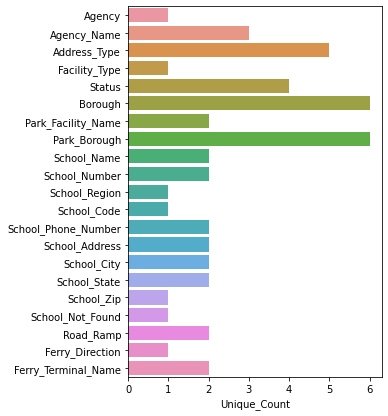

In [9]:
# Filtering Categorical DataSet based on Certain Criteria 
Feature_Data_stats_catagorical = Feature_Data_stats[(Feature_Data_stats["Unique_Count"]<10)& (Feature_Data_stats["Data_Type"]=="object")]

# Visualizing the Feature_Data_Stats of catagorical feature 
plt.figure(figsize=(10,15))
plt.subplot(2,2,2)
sns.barplot(y=Feature_Data_stats_catagorical.index, x= Feature_Data_stats_catagorical["Unique_Count"])
plt.show()

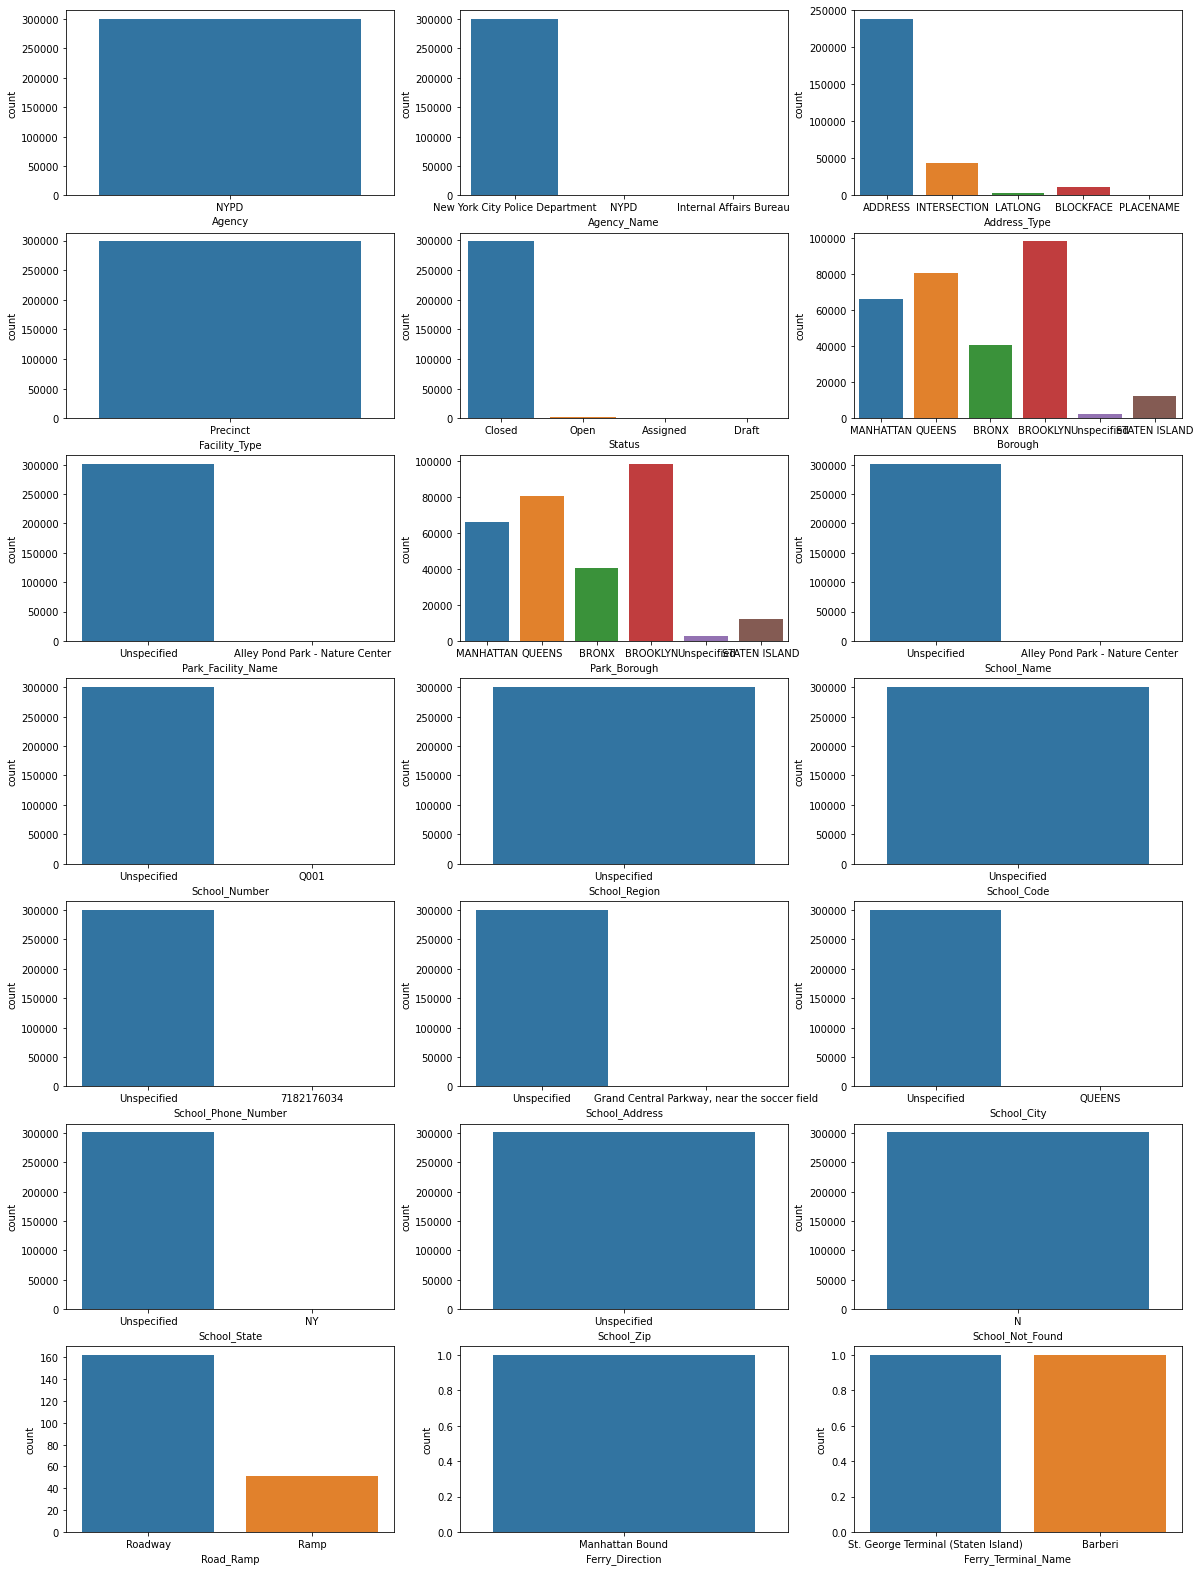

In [10]:
# Futher exploring the Feature_Data_stats_categorical dataframe with respect to the distribution of categories across the dataset
catagorical_labels= Feature_Data_stats_catagorical.index
fig, axes = plt.subplots(7,3, figsize=(20, 28))
count=0
for row in range(0,7):
  for col in range(0,3):
    g=sns.countplot(x=catagorical_labels[count], data= df,ax=axes[row,col])
    count +=1
plt.show()


##### Summary
After exploring the categorical variable of NYPD dataset, the following  conclusion can be drawn:
* There are Multiple feature variables which is reperesented by Single categorical, therefore it can be droped as the weightage is equal over the entire dataset 

* Certain feature variables , where more than 99% of the data are "Unspecified" can be terms as **Missing Completely At Random (MCAR)**,and can de droped from future analysis 

* Park Borough and Borough are two sets of Data , where the simple frequency chart  are identical , however its combiantion with other feature variable may be different . Therefore  to take a call for droping any one column,scope for further analysis is there

* Ferry_Terminal_Name and Ferry_Direction are two column , where sample count with respect two the particular column is maximum 2 and the remianing is null value . therefore it can droped from futher analysis.

In [11]:
# Make new dataframe based on the above summary without the Error Data, Inappropriate feature columm and Duplicate Feature Variable
df.drop(["Agency","Agency_Name","Facility_Type","Ferry_Direction","Ferry_Terminal_Name","School_Not_Found","School_Zip","School_State","School_City","School_Address","School_Phone_Number","School_Code","School_Region","School_Number","School_Name"],axis=1,inplace=True)

###### 1b. Exploring Univariant DataSet-Continous Variable

In [12]:
# Exploring Non_Catagorical DataSet based
Feature_Data_stats_Continous = df.select_dtypes(["int","float64","datetime"])
Feature_Data_stats_Continous_Unique_Value_Count=Feature_Data_stats_Continous.nunique()
Feature_Data_stats_Continous_Unique_Value_Count

Unique_Key                      300698
Created_Date                    259493
Closed_Date                     237165
Incident_Zip                       201
X_Coordinate_State_Plane         63226
Y_Coordinate_State_Plane         73694
School_or_Citywide_Complaint         0
Vehicle_Type                         0
Taxi_Company_Borough                 0
Taxi_Pick_Up_Location                0
Garage_Lot_Name                      0
Latitude                        125122
Longitude                       125216
dtype: int64

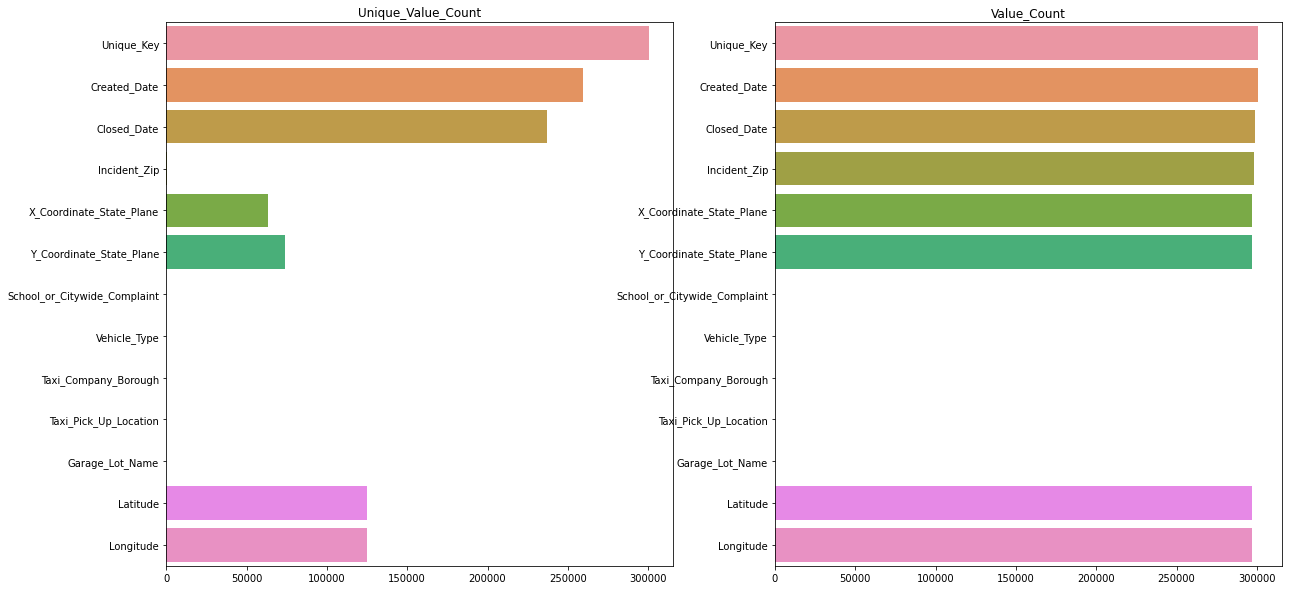

In [13]:
fig, axes = plt.subplots(1,2, figsize=(20, 10))
sns.barplot(x=Feature_Data_stats_Continous_Unique_Value_Count.values,y=Feature_Data_stats_Continous_Unique_Value_Count.index,ax=axes[0])
axes[0].title.set_text("Unique_Value_Count")
sns.barplot(x=Feature_Data_stats_Continous.count(), y =Feature_Data_stats_Continous.columns,ax=axes[1])
axes[1].title.set_text("Value_Count")
plt.show()

In [14]:
# Undertanding the Correlation within Contionus feature Variable
Feature_Data_stats_Continous.corr()

,Unique_Key,Incident_Zip,X_Coordinate_State_Plane,Y_Coordinate_State_Plane,School_or_Citywide_Complaint,Vehicle_Type,Taxi_Company_Borough,Taxi_Pick_Up_Location,Garage_Lot_Name,Latitude,Longitude
Unique_Key,1.000000,0.024840,-0.009176,-0.032238,NaN,NaN,NaN,NaN,NaN,-0.032243,-0.009180
Incident_Zip,0.024840,1.000000,0.392038,-0.498235,NaN,NaN,NaN,NaN,NaN,-0.498488,0.391383
X_Coordinate_State_Plane,-0.009176,0.392038,1.000000,0.364517,NaN,NaN,NaN,NaN,NaN,0.364002,0.999999
Y_Coordinate_State_Plane,-0.032238,-0.498235,0.364517,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.365481
School_or_Citywide_Complaint,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taxi_Company_Borough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taxi_Pick_Up_Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage_Lot_Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,-0.032243,-0.498488,0.364002,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.364966


##### Summary 
From the above Visualization  and non Graphical analysis ,the following conclusion can be drawn:
* "Incident_Zip" is an categorical feature as its  overall value_count is close to 300,000 and unique_count is 201. Therfore for further analysis , it is need to be chuck in smaller groups .

* Feature Columns : ["School_or_Citywide_Complaint","Vehicle_Type","Taxi_Company_Borough","Taxi_Pick_Up_Location","Garage_Lot_Name"]can be considered as **Missing Completely At Random (MCAR)**,and can de droped from the dataset

* Feature Column :[X_Coordinate_(State_Plane),Y_Coordinate_(State_Plane)] is same as Latitude and Longitude as the correlation value is close to One respectively, Therefore any X_Coordinate_(State_Plane),Y_Coordinate_(State_Plane) can be dropped

In [15]:
# Drop feature data based upon the above Summary
df.drop(["School_or_Citywide_Complaint","Vehicle_Type","Taxi_Company_Borough","Taxi_Pick_Up_Location","Garage_Lot_Name","X_Coordinate_State_Plane","Y_Coordinate_State_Plane"] , axis=1, inplace=True)

#### 2.Missing Value Treatment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


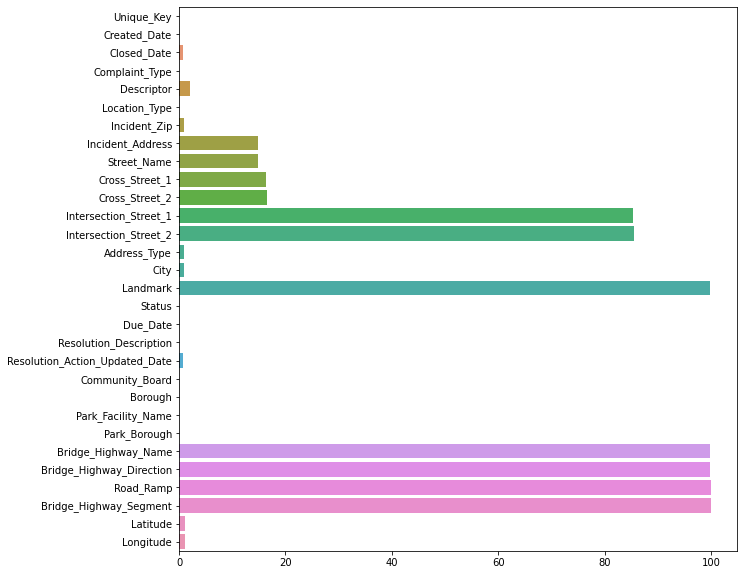

In [16]:
# Understanding the missing value percentage of the dataSet
missing_value_percentage = df.isnull().sum()/len(df) *100
plt.figure(figsize=(10,10))
sns.barplot(missing_value_percentage.values,missing_value_percentage.index)
plt.show()

##### Summary 
Based upon the Bar Chart and the Table for Missing Value Percentage , following  Conclusion can be drawn:
* Column With more than 99% can be considered as **Missing Completely At Random (MCAR)**,and can de droped from future analysis 
* Catagorical Variable with More than 5% and Less 90%  missing value can be replaced by adding a new category named "Unspecified" to retain the sanity of the dataset 
* Rest all catagorical  missing value , Maximum Frequency value (Mode) can be used to replace the null value and same measures for Feature variable ("Latitude" and "Longitude")
* For Continous Feature Data, specially  "Close_Date", the Mean Interval between Create_Date and Close_Date can be added to the Create_Date to fill the Missing value ( after handling outlier in Interval Data) 




In [17]:
# Droping feature column with 99% or more null value
df.drop(["Bridge_Highway_Name","Bridge_Highway_Direction","Road_Ramp","Bridge_Highway_Segment","Landmark"],axis=1,inplace=True)

In [18]:
# Filling Catagorical Variable with Max Frequency Value 
for col in ["Descriptor","Address_Type","City","Location_Type","Latitude","Longitude","Incident_Zip"]:
  df[col].fillna(df[col].mode()[0], inplace=True)

In [19]:
#Filling Categorical Variable with new Category "Unspecified"
for col in ["Incident_Address","Street_Name","Cross_Street_1","Cross_Street_2","Intersection_Street_1","Intersection_Street_2","Resolution_Action_Updated_Date"]:
  df[col].fillna("Unspecified", inplace=True)

## Q1. Analysis Task - One
* Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [20]:
# Creating the Interval Column 
df["Request_Closing_Time"] = df.Closed_Date - df.Created_Date


In [21]:
# Handling the Missing Data in Request_Closing_Time
df["Request_Closing_Time"].fillna(df["Request_Closing_Time"].mode()[0], inplace=True)

# Updating Closed_Date Feature based upon Request_Closing_Time and Create Date
df["Closed_Date"] = df["Created_Date"] + df["Request_Closing_Time"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   Unique_Key                      300698 non-null  int64          
 1   Created_Date                    300698 non-null  datetime64[ns] 
 2   Closed_Date                     300698 non-null  datetime64[ns] 
 3   Complaint_Type                  300698 non-null  object         
 4   Descriptor                      300698 non-null  object         
 5   Location_Type                   300698 non-null  object         
 6   Incident_Zip                    300698 non-null  float64        
 7   Incident_Address                300698 non-null  object         
 8   Street_Name                     300698 non-null  object         
 9   Cross_Street_1                  300698 non-null  object         
 10  Cross_Street_2                  300698 non-n

## Q2. Analysis Task - Two
Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

#### 1.Univariate Analysis - Complaint_Type

In [22]:
complaint_Type = df.Complaint_Type.value_counts()/df.Complaint_Type.count()*100
complaint_Type

Blocked Driveway             25.621720
Illegal Parking              25.062022
Noise - Street/Sidewalk      16.166386
Noise - Commercial           11.831472
Derelict Vehicle              5.892291
Noise - Vehicle               5.681115
Animal Abuse                  2.586648
Traffic                       1.495853
Homeless Encampment           1.468583
Noise - Park                  1.344206
Vending                       1.264392
Drinking                      0.425676
Noise - House of Worship      0.309613
Posting Advertisement         0.216164
Urinating in Public           0.196875
Bike/Roller/Skate Chronic     0.142003
Panhandling                   0.102096
Disorderly Youth              0.095112
Illegal Fireworks             0.055870
Graffiti                      0.037579
Agency Issues                 0.001995
Squeegee                      0.001330
Ferry Complaint               0.000665
Animal in a Park              0.000333
Name: Complaint_Type, dtype: float64

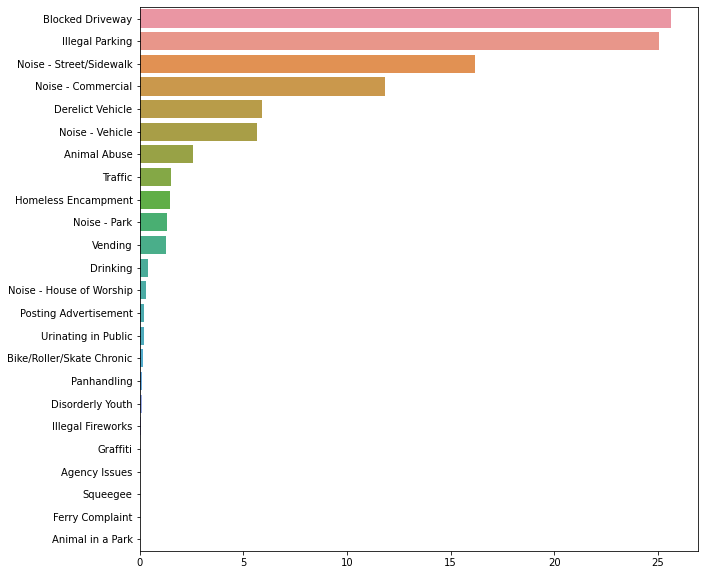

In [23]:
plt.figure(figsize=(10,10))
sns.barplot(x=complaint_Type.values,y= complaint_Type.index)
plt.show()

##### Conclusion_1

The Major complaint type handled by New York City 311 are following:
1. Blocked_Drive Way (25.63%) 
2. Illegal Parking (25.06%)
3. Noise related complaint of different type  which together adds upto 35.03% 



#### 2.Multivariate Analysis - Complaint Time

In [24]:
# Univariate Analysis - Created_Date
df_Time_Analysis = pd.DataFrame()
df_Time_Analysis["Complaint_Type"] = df.Complaint_Type
df_Time_Analysis["Time"] = [d.time() for d in df['Created_Date']]
df_Time_Analysis["Time"] = pd.to_datetime(df_Time_Analysis['Time'], format='%H:%M:%S').apply(lambda t: t.replace(second=0))
df_Time_Analysis["Date"]= [d.date() for d in df['Created_Date']]
df_Time_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Complaint_Type  300698 non-null  object        
 1   Time            300698 non-null  datetime64[ns]
 2   Date            300698 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 6.9+ MB


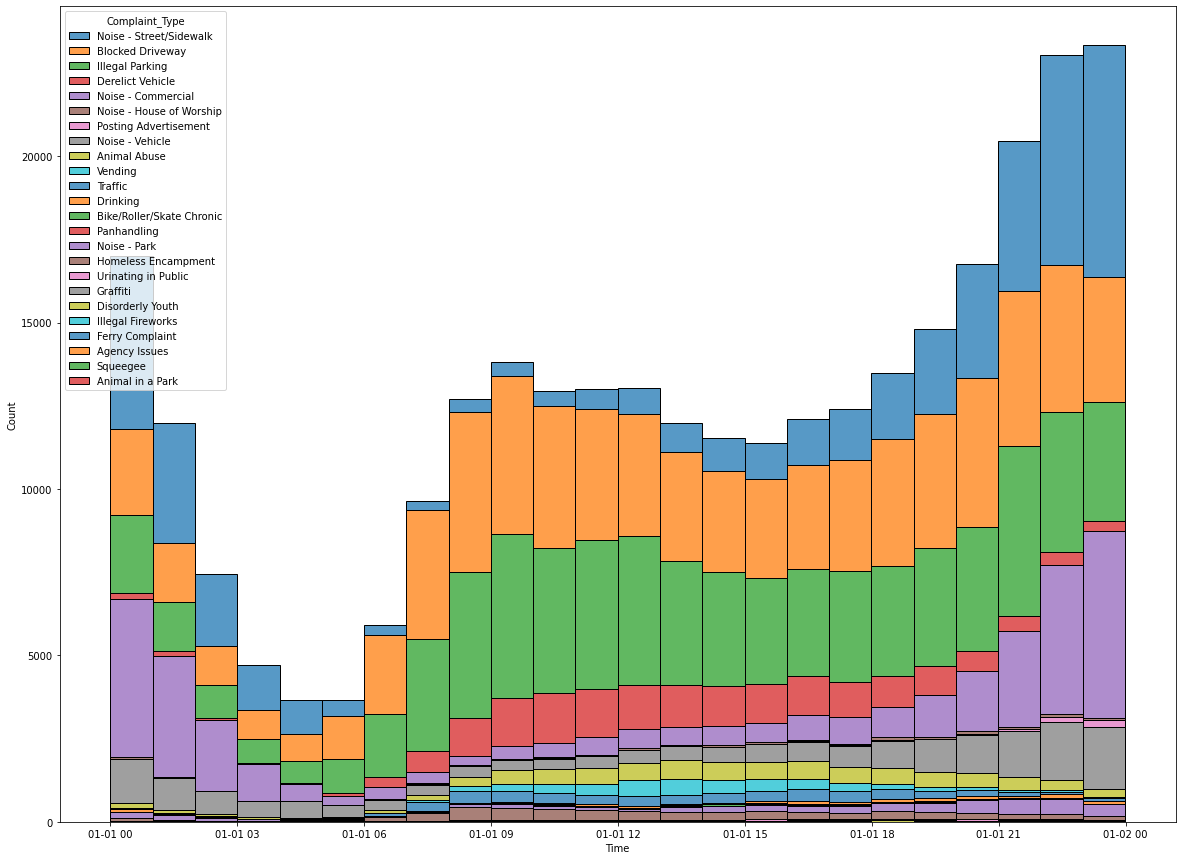

In [25]:
plt.figure(figsize=(20,15))
sns.histplot(x="Time", data=df_Time_Analysis,bins=24, hue ="Complaint_Type",multiple="stack",palette="tab10")
plt.show()

##### Conclusion_2
From the above visualization , the conclusion drawn are as follows:
* The call load recieved by the New York City 311 around 3:00 am to 6:00 am is the least and at its peek around 9:00 pm to 12:00 pm.in the 24hr timeframe.

*  Illegal Praking and Blocked Driveway is the major complaint Type,through out the Day starting around 6:00am in the Morning to 2:00am in the Night

* The Noise complaint call is more during the evening time and at its peak in the night from 10:00om to 2:00pm  where both Noise_Commerical  and Noise- Sidewalk/street share the  maximum weightage .



#### 3.Multivariate Analysis -Cities vs the Complaint Count

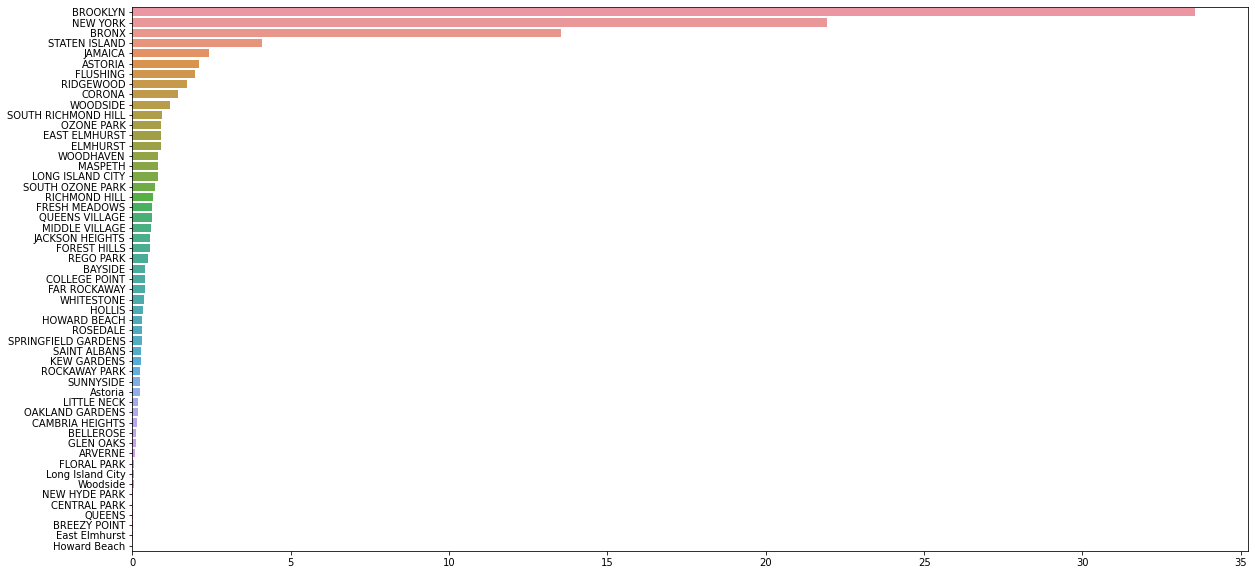

In [26]:
# Complaint percentage With respect to the City
city_complaint_count= df.City.value_counts()/df.City.count()*100
plt.figure(figsize=(20,10))
sns.barplot(y=city_complaint_count.index,x= city_complaint_count.values)
plt.show()

##### Conclusion_3
From the above visualization,it was clear that top three cities from where the NY311 gets the  maximum complaint are:
1. Brooklyn (35.5%) 
2. NewYork (21.94%)
3. Bronx (13.53%)


#### 4.Multivariate Analysis -Top 3 Cities Vs the Complaint Type

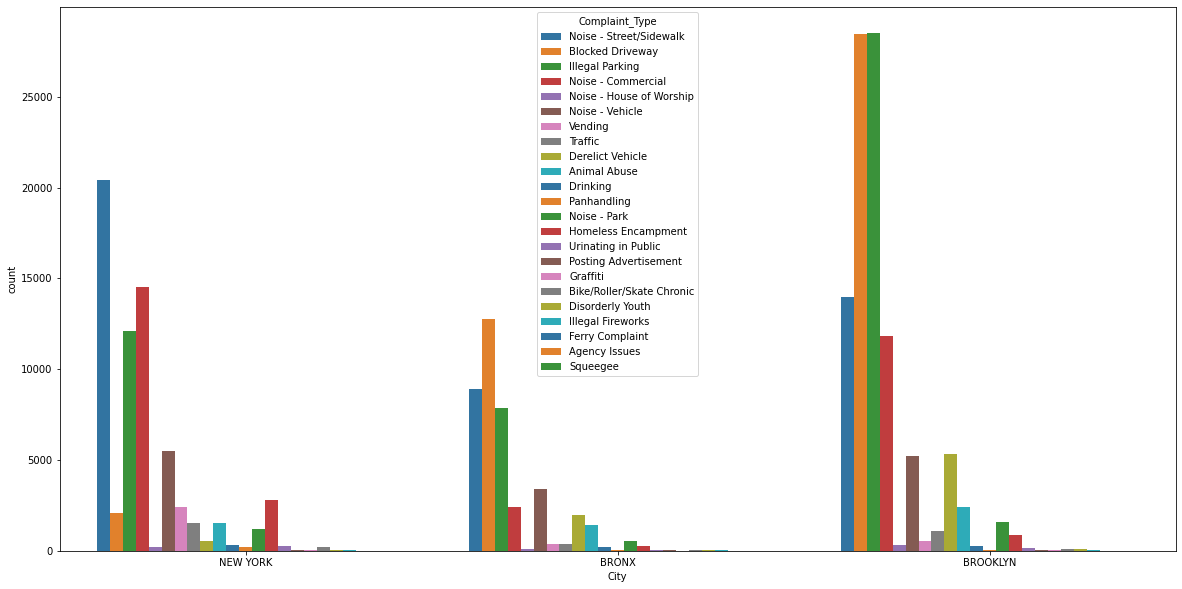

In [27]:
df_Top_Three_Cities= df[(df["City"]=="BROOKLYN") |(df["City"]=="NEW YORK")|(df["City"]=="BRONX") ]
plt.figure(figsize=(20,10))
sns.countplot(x= df_Top_Three_Cities.City,hue=df_Top_Three_Cities.Complaint_Type,palette="tab10")
plt.show()


##### Conclusion_4
As per the Visualization, New York is the City where the Noise from the street and sidewalks and the illegal Parking  are the major reason for the call to NY311 whereas for Brooklyn City , Illegal Parking and Blocked Driveway are the major reasons. In Bronx City , Blocked Drive way is the major complaint type .


## Q3. Analysis Task - Three
* Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [28]:
# Converting the Request_Closing_Time into Seconds and changinf the data type from float to int
df["Request_Closing_Time"]=df.Request_Closing_Time.dt.total_seconds().astype("int")

In [29]:
df.groupby(["City","Complaint_Type"],as_index=True).agg({"Request_Closing_Time":["mean"]}).astype(int)

Request_Closing_Time
                                                 mean
City     Complaint_Type                              
ARVERNE  Animal Abuse                            7753
         Blocked Driveway                        9093
         Derelict Vehicle                       10685
         Disorderly Youth                       12928
         Drinking                                 859
...                                               ...
Woodside Blocked Driveway                       23062
         Derelict Vehicle                       17880
         Illegal Parking                        18789
         Noise - Commercial                      8619
         Noise - Street/Sidewalk                12280

[766 rows x 1 columns]

## Q4. Analysis Task - Four
Perform a statistical test for the following: Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.
1. Whether the average response time across complaint types is similar or not (overall)
2. Are the type of complaint or service requested and location related?

#### 1. Average response time across complaint types is similar or not

* Null Hypothesis: The average response time across the complaint type is similar 
* Alternative Hypothesis: The average response time across the complaint type is not similar

In [30]:
from scipy.stats import f_oneway # ANOVA  Single factor 
# Group the data based  upon complaint type
dfs = [x for _, x in df.groupby("Complaint_Type")]
f_oneway(dfs[0].Request_Closing_Time,dfs[1].Request_Closing_Time,dfs[2].Request_Closing_Time,dfs[3].Request_Closing_Time,dfs[4].Request_Closing_Time,dfs[5].Request_Closing_Time,dfs[6].Request_Closing_Time,dfs[7].Request_Closing_Time,dfs[8].Request_Closing_Time,dfs[9].Request_Closing_Time,dfs[10].Request_Closing_Time,dfs[11].Request_Closing_Time,dfs[12].Request_Closing_Time,dfs[13].Request_Closing_Time,dfs[14].Request_Closing_Time,dfs[15].Request_Closing_Time,dfs[16].Request_Closing_Time,dfs[17].Request_Closing_Time,dfs[18].Request_Closing_Time,dfs[19].Request_Closing_Time,dfs[20].Request_Closing_Time)


F_onewayResult(statistic=556.34123272407, pvalue=0.0)

In [31]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Request_Closing_Time ~ Complaint_Type',data=df).fit()
aov_table = sm.stats.anova_lm(model)
print(aov_table)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                      df        sum_sq       mean_sq           F  PR(>F)
Complaint_Type      23.0  5.235656e+12  2.276372e+11  493.765595     0.0
Residual        300674.0  1.386176e+14  4.610228e+08         NaN     NaN


##### Conclusion
As the P_Value is 0.0 which means that it  actual value is way below 0.05. Therefore , Null hypothesis can be rejected and the alternate hypothesis can be accepted . i.e The average response time across the complaint type is not similar  

#### 2. Are the type of complaint or service requested and location related?

* Null Hypothesis: The type of complaint or service requested and location are related
* Alternative Hypothesis: type of complaint or service requested and location are independent

In [32]:
data = pd.crosstab(df["City"],df["Complaint_Type"])
data.values

array([[  0,  38,   0, ...,   0,   1,   1],
       [  0, 125,   0, ...,  47,   9,  54],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,  45,   0, ...,   6,   2,   6],
       [  0,  69,   0, ...,  39,   8,  15],
       [  0,   0,   0, ...,   0,   0,   0]])

In [33]:
# Perform the Chi-Square Test of Independence
import scipy.stats as stats
stats.chi2_contingency(data)

(120119.11282606117,
 0.0,
 1196,
 array([[4.38978643e-03, 5.69062648e+00, 7.31631072e-04, ...,
         3.29087656e+00, 4.33125594e-01, 2.78166133e+00],
        [1.26306128e-01, 1.63734844e+02, 2.10510213e-02, ...,
         9.46874938e+01, 1.24622046e+01, 8.00359829e+01],
        [1.43067130e-02, 1.85462690e+01, 2.38445217e-03, ...,
         1.07252659e+01, 1.41159569e+00, 9.06568717e+00],
        ...,
        [4.91656080e-02, 6.37350165e+01, 8.19426800e-03, ...,
         3.68578175e+01, 4.85100666e+00, 3.11546069e+01],
        [7.07154687e-02, 9.16708192e+01, 1.17859114e-02, ...,
         5.30130297e+01, 6.97725958e+00, 4.48100353e+01],
        [2.39442896e-03, 3.10397808e+00, 3.99071494e-04, ...,
         1.79502358e+00, 2.36250324e-01, 1.51726982e+00]]))

##### Conclusion
As the P_Value is 0.0 which means that it  actual value is way below 0.05. Therefore , Null hypothesis can be rejected and the Alternate hypothesis can be accepted . i.e type of complaint or service requested and location are independent